# Credit Card Fraud Detection

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Download and unzip the dataset**
   * **Read the dataset**
   
### [3. Exploratory Analysis](#explore)

### [4. Model Architecture](#cnn)
   * **Split the dataset**
   * **Set hyperparameters**
   * **Define the model**
   * **Train model**

### [5. Model Evaluation](#eval)
   * **Model Accuracy**
   * **Observations**

### [6. Prediction](#predict)

### [7. Save Model to Disk](#save)
  

<a id="intro"></a>
### 1. Introduction

#### About the dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

#### Problem statement
Classify the transactions as **fraud (1)** and **legitimate (0)**.

#### Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud/

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

#### Download and unzip the dataset

In [2]:
# Download data set if it does not exist.
if not os.path.exists("creditcardfraud.zip"):
    !kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the file if not already unzipped.
if not os.path.exists("creditcard.csv"):
    !unzip creditcardfraud.zip

<IPython.core.display.Javascript object>

#### Read the dataset

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<IPython.core.display.Javascript object>

<a id="explore"></a>
### 3. Exploratory Analysis

In [4]:
# Get the shape of dataset.
df.shape

(284807, 31)

<IPython.core.display.Javascript object>

The dataset contains 284807 rows and 31 columns.

In [5]:
# Get dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<IPython.core.display.Javascript object>

In [6]:
# Identify columns with null values.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<IPython.core.display.Javascript object>

None of the columns contains null values.

In [7]:
# Describe the dataset by basic statistical calculations.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<IPython.core.display.Javascript object>

This method generates a quick summary containing count, mean, standard deviation, minimum, maximum and quartile ranges.

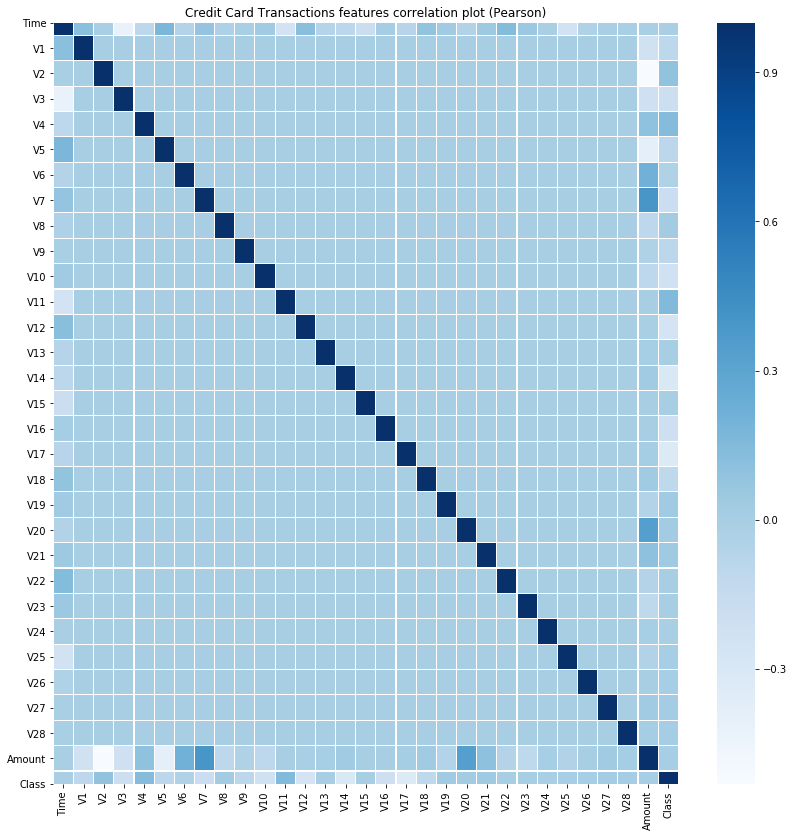

<IPython.core.display.Javascript object>

In [8]:
# Feature correlation.
plt.figure(figsize=(14, 14))
plt.title("Credit Card Transactions features correlation plot (Pearson)")
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=0.1,
    cmap="Blues",
)
plt.show()

No notable correlation between features.

Text(0, 0.5, 'Frequency')

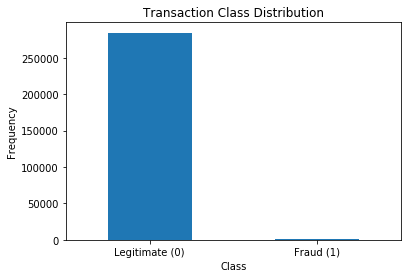

<IPython.core.display.Javascript object>

In [9]:
LABELS = ["Legitimate (0)", "Fraud (1)"]
count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

As we can see the data set is imbalenced.
With maximum entries as legitimate.

In [10]:
Fraud = df[df["Class"] == 1]
Legitimate = df[df["Class"] == 0]
print("Number of Legitimate entries = {}".format(len(Legitimate)))
print("Number of Fraud entries = {}".format(len(Fraud)))

Number of Legitimate entries = 284315
Number of Fraud entries = 492


<IPython.core.display.Javascript object>

<a id="cnn"></a>
### 4. Model Architecture

#### Split the dataset

In [11]:
X = df.drop("Class", axis=1)
Y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Convert data to numpy arrays to be fed into algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

<IPython.core.display.Javascript object>

#### Set hyperparameters

In [12]:
num_neighbours = 7
n_est = 100

<IPython.core.display.Javascript object>

#### Define the model

In [13]:
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=num_neighbours),
    "Gaussian Naive Bays": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
}

<IPython.core.display.Javascript object>

#### Train model

In [14]:
Acc = {}

<IPython.core.display.Javascript object>

In [15]:
# Train classifiers.
print("Cross-Validation Scores for classifiers:-")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    Acc[key] = accuracy
    print("{}: {}".format(key, round(cv_score.mean() * 100.0, 2)))

Cross-Validation Scores for classifiers:-
Logisitic Regression: 99.9
K Nearest Neighbors: 99.83
Gaussian Naive Bays: 99.34
Decision Tree Classifier: 99.92


<IPython.core.display.Javascript object>

<a id="eval"></a>
### 5. Model Evaluation

#### Model Accuracy

In [16]:
for model, acc in Acc.items():
    print("Accuracy for {} = {}".format(model, acc * 100))

Accuracy for Logisitic Regression = 99.89993328885924
Accuracy for K Nearest Neighbors = 99.83673326077034
Accuracy for Gaussian Naive Bays = 99.30128857835048
Accuracy for Decision Tree Classifier = 99.91222218320986


<IPython.core.display.Javascript object>

#### Observations:
Decision Tree Classifier has the highest accuracy!

<a id="predict"></a>
### 6. Prediction

In [17]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>

In [18]:
print("Confusion matrix")
cm = confusion_matrix(y_test, predictions)
print(cm)

Confusion matrix
[[56833    31]
 [   18    80]]


<IPython.core.display.Javascript object>

<a id="save"></a>
### 7. Save Model to Disk

In [19]:
# Do not commit saved models to GitHub.

<IPython.core.display.Javascript object>